<a href="https://colab.research.google.com/github/fboldt/aulasann/blob/main/aula07a_mnist_flat_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


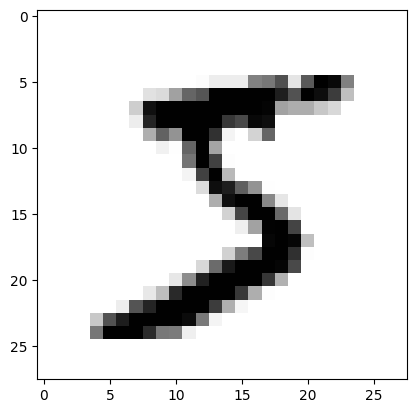

In [15]:
from matplotlib import pyplot as plt
digit = train_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [16]:
train_labels[0]

np.uint8(5)

In [17]:
import numpy as np
samples = np.random.randint(0,train_images.shape[0],9)
samples

array([22459,  2105, 22833,  2938, 54166, 31127,  8531, 36078, 31509])

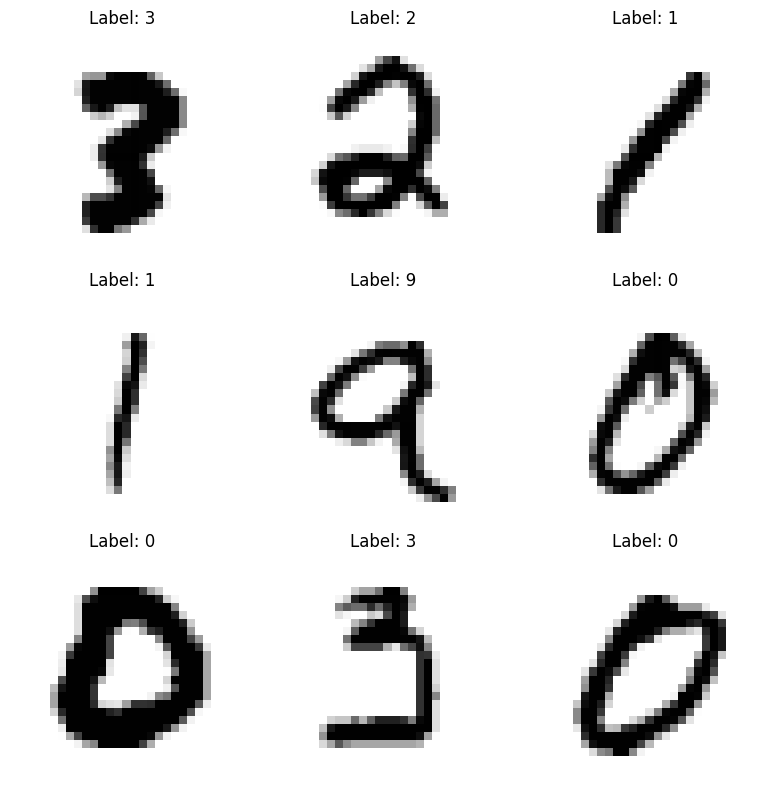

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
for i, sample_index in enumerate(samples):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_images[sample_index], cmap=plt.cm.binary)
    plt.title(f"Label: {train_labels[sample_index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [19]:
train_flat_images = train_images.reshape((60000, 28 * 28))
test_flat_images = test_images.reshape((10000, 28 * 28))
print(train_flat_images.shape)

(60000, 784)


In [20]:
print(f"n_classes: {len(np.unique(train_labels))}")

n_classes: 10


In [21]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    train_flat_images,
    train_labels,
    epochs=5,
    batch_size=128
)

test_loss, test_acc = model.evaluate(test_flat_images, test_labels)
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8279 - loss: 18.0863
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9527 - loss: 0.7343
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9637 - loss: 0.4452
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9723 - loss: 0.3436
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9771 - loss: 0.2740
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9612 - loss: 0.7932
Test accuracy: 0.968500018119812
Test loss: 0.6311105489730835


In [22]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score
import numpy as np

def BasicKerasNN(num_classes):
  return keras.Sequential([
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
  ])

class KerasWrappedNN(BaseEstimator, ClassifierMixin):
  def __init__(self, epochs=5, batch_size=128, model_fabric=BasicKerasNN):
    self.epochs = epochs
    self.batch_size = batch_size
    self.model_fabric = model_fabric

  def fit(self, X, y):
    self.labels, ids = np.unique(y, return_inverse=True)
    yhot = keras.utils.to_categorical(ids, len(self.labels))
    self.model = self.model_fabric(len(np.unique(y)))
    self.model.compile(
        optimizer='rmsprop',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    self.model.fit(
        X, yhot,
        epochs=self.epochs,
        batch_size=self.batch_size
    )
    return self

  def predict(self, X):
    y_proba = self.model.predict(X)
    return self.labels[np.argmax(y_proba, axis=1)]

model = KerasWrappedNN(epochs=5, batch_size=128)
model.fit(train_flat_images, train_labels)
y_pred = model.predict(test_flat_images)
accuracy_score(test_labels, y_pred)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8328 - loss: 16.2833
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9521 - loss: 0.6874
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9653 - loss: 0.4392
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9726 - loss: 0.3516
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9786 - loss: 0.2565
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


0.9649

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", KerasWrappedNN())
])

pipeline.fit(train_flat_images, train_labels)
y_pred = pipeline.predict(test_flat_images)
accuracy_score(test_labels, y_pred)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9010 - loss: 0.3385
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9741 - loss: 0.0873
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9848 - loss: 0.0499
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9910 - loss: 0.0306
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9946 - loss: 0.0201
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


0.9744

In [24]:
from sklearn.base import TransformerMixin

class Divide255(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X / 255.0

pipeline = Pipeline([
    ("scaler", Divide255()),
    ("model", KerasWrappedNN())
])

pipeline.fit(train_flat_images, train_labels)
y_pred = pipeline.predict(test_flat_images)
accuracy_score(test_labels, y_pred)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8692 - loss: 0.4464
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9650 - loss: 0.1175
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9796 - loss: 0.0710
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9855 - loss: 0.0509
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9894 - loss: 0.0358
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


0.9797

In [25]:
class Shape2Flat(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X.reshape((-1, 28 * 28))

pipeline = Pipeline([
    ("shape2flat", Shape2Flat()),
    ("scaler", Divide255()),
    ("model", KerasWrappedNN())
])

pipeline.fit(train_images, train_labels)
y_pred = pipeline.predict(test_images)
accuracy_score(test_labels, y_pred)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8743 - loss: 0.4394
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9660 - loss: 0.1158
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9792 - loss: 0.0704
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9844 - loss: 0.0509
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9898 - loss: 0.0371
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


0.9798

In [26]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ("shape2flat", Shape2Flat()),
    ("scaler", Divide255()),
    ("model", RandomForestClassifier())
])

pipeline.fit(train_images, train_labels)
y_pred = pipeline.predict(test_images)
accuracy_score(test_labels, y_pred)

0.9701